In [1]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Reloading
from importlib import reload

# Local imports
import sys
sys.path.append('../../../')
import imagestuff as ims

In [2]:
%matplotlib notebook

In [3]:
# Read the input dataset, including spacing in micrometers
imageroot = '20190702_case2.0'
dx,dy,cA,cB,cC,cD,Filename = ims.getc2('', 'SEMimages/', imageroot,'A')
print("Filename, dx and dy", Filename, dx, dy)

SEMimages/20190702_case2.0-A.bmp
SEMimages/20190702_case2.0-B.bmp
SEMimages/20190702_case2.0-C.bmp
SEMimages/20190702_case2.0-D.bmp
Filename, dx and dy SEMimages/20190702_case2.0-A.bmp 0.7632211 0.7632211


The next cell has to be run multiple times, with adjustments to the Euler angles till there's a good fit.

<IPython.core.display.Javascript object>


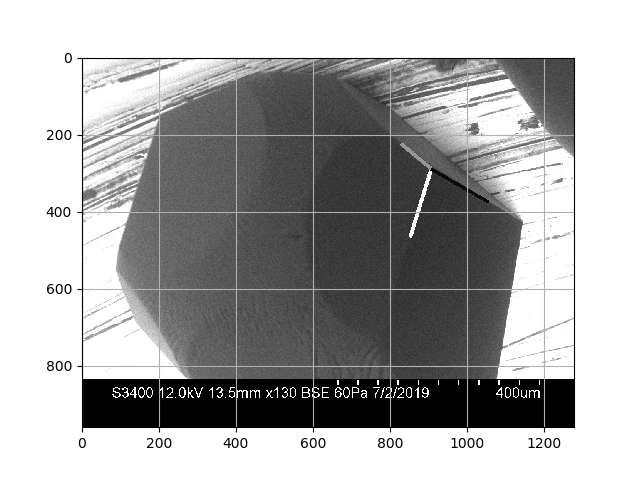

In [4]:
# Show the image
im = PIL.Image.open(Filename)
draw = PIL.ImageDraw.Draw(im)

# These are display parameters
filla = 255
fillb = 150
fillc = 10
scale = 200
linewidth = 10

# Specify the origin and Euler angles
xorigin = 906
yorigin = 290
alpha = 155
beta = 60
gamma = -60
    
# Lay out three vectors defining the orientation of the crystal (before rotation)
cvec_start = np.matrix([0,0,-1]).T; 
avec_start = np.matrix([1,0,0]).T; 
Rot60 = ims.myrotation_matrix(cvec_start,-120)
bvec_start = Rot60*avec_start; 

# Construct the rotation matrix
Rotalpha = ims.myrotation_matrix(np.matrix([0,0,1]).T,alpha)
Rotbeta  = ims.myrotation_matrix(np.matrix([1,0,0]).T,beta)
Rotgamma = ims.myrotation_matrix(np.matrix([0,0,1]).T,gamma)
RotEuler = Rotgamma*Rotbeta*Rotalpha

# Make the new vectors
avec = RotEuler*avec_start
bvec = RotEuler*bvec_start
cvec = RotEuler*cvec_start

# Draw the vectors
linea = [xorigin,yorigin,xorigin+avec[0]*scale,yorigin+avec[1]*scale]
lineb = [xorigin,yorigin,xorigin+bvec[0]*scale,yorigin+bvec[1]*scale]
linec = [xorigin,yorigin,xorigin+cvec[0]*scale,yorigin+cvec[1]*scale]
draw.line(linea, fill=filla,width=linewidth)
draw.line(lineb, fill=fillb,width=linewidth)
draw.line(linec, fill=fillc,width=linewidth)

# Finish up
plt.imshow(im,cmap = 'Greys_r', vmin = 0,vmax = 255)
plt.grid(True)

In [22]:
# Specifying the angles and origin in an output file
xtlvecsfile = 'Xtlvecs.nml'
cfile = open(xtlvecsfile,'w')
cfile.write('&Xtlvecs\n')
cfile.write('   '+'xorigin = '+str(xorigin) +'\n')
cfile.write('   '+'yorigin = '+str(yorigin) +'\n')
cfile.write('   '+'avec = '+str(avec[0,0])+','+str(avec[1,0])+','+str(avec[2,0])+'\n')
cfile.write('   '+'bvec = '+str(bvec[0,0])+','+str(bvec[1,0])+','+str(bvec[2,0])+'\n')
cfile.write('   '+'cvec = '+str(cvec[0,0])+','+str(cvec[1,0])+','+str(cvec[2,0])+'\n')
cfile.write('/ \n')
cfile.close()